In [ ]:
# Create 3 files : tensorflow implementation, for loop implementation and vector implementation

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [1]:
# Divide the larger file into train set, dev set and test set using sklearn
# this will make it easier to work with

In [2]:
import pandas as pd
load_train_data = pd.read_csv('datasets/mnist_train.csv')

In [ ]:
# perform model evaluation and selection using train set and devset

In [ ]:
# Do this project requires feature scaling / Normalization ?

In [3]:
# numpy softmax activation func implementation
def my_softmax(z):
    N = len(z)
    a = np.zeros(N)
    sum = 0
    for i in range(N):
        sum += np.exp(z[i])
    for j in range(N):
        a[j] = np.exp(z[i])/sum
    return a

In [4]:
X = load_train_data.drop(['label'], axis = 1)
y = load_train_data['label']

In [5]:
X.shape

(60000, 784)

In [6]:
y.shape

(60000,)

In [7]:
X = X.to_numpy()
y = y.to_numpy()

In [8]:
RES = list(set(y))
RES

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

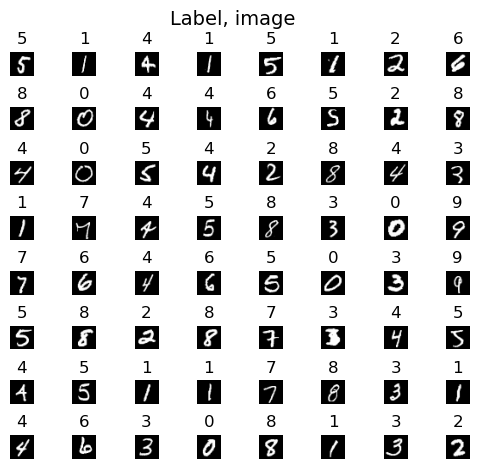

In [9]:
import matplotlib.pyplot as plt

m, n = X.shape
fig, axes = plt.subplots(8,8, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((28, 28))
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [10]:
tf.random.set_seed(1234) # for consistency
model=Sequential([
    tf.keras.Input(shape=(784,)), # input shape
    Dense(units=25, activation='relu', name='L1'),
    Dense(units=15, activation='relu', name='L2'),
    Dense(units=10, activation='linear', name='L3'),
], name='my_model'
) # If output probabilities are desired, apply a softmax function

In [11]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
[layer1, layer2, layer3] = model.layers

In [13]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [14]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
history = model.fit(
    X, y,
    epochs=40
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - loss: 4.5869   
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - loss: 1.2510
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - loss: 0.9852
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - loss: 0.7442
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - loss: 0.5159
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - loss: 0.3337
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - loss: 0.2740
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - loss: 0.2363
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - loss: 0.2119
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - loss: 0.1941
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - loss: 0.1739
Epoch 12/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - loss: 0.1651
Epoch 13/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - loss: 0.1556
Epoch 14/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - loss: 0.149

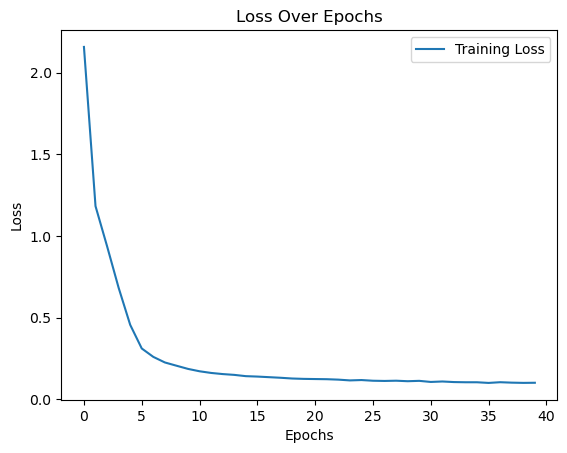

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [16]:
load_test_dataset = pd.read_csv('datasets/mnist_test.csv')

In [17]:
X = load_test_dataset.drop(['label'], axis = 1)
y = load_test_dataset['label']

In [18]:
X = X.to_numpy()
y = y.to_numpy()

In [19]:
u, v = X.shape

In [1]:
# P = len(X)
# prediction = np.zeros(len(y))
# for rows in range(u):
#     prediction[rows] = model.predict(X[rows].reshape(1, 784))


In [ ]:
# Find out how many layers and units are needed
# Try larger NN with regularization use the flowchart from andrew 
# calculate training error and dev set error which will show the bias or variance problem [ week 3 C2 ]
# Find the baseline performance for MNIST datasets based on competing algorithm performance
# Utilize model selection 